<a href="https://colab.research.google.com/github/supun-kanda/advanced-cache-replacement/blob/main/existing_algorithm_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

Datasets
1.   Caffiene Block cache trace: web07 (uploaded)
2.   Twitter Cluster based file cache: cluster052




In [2]:
path_web07 = '/content/web07.trace'
path_web12 = '/content/web12.trace'
path_cluster052 = 'https://raw.githubusercontent.com/twitter/cache-trace/master/samples/2020Mar/cluster052'

Load web07 cache

In [3]:
with open(path_web07, 'rb') as file:
    data = file.read(4) # integer = 4 x bytes
    web07 = []
    while data:
      web07.append(int.from_bytes(data, "big"))
      data = file.read(4)

In [4]:
with open(path_web12, 'rb') as file:
    data = file.read(4) # integer = 4 x bytes
    web12 = []
    while data:
      web12.append(int.from_bytes(data, "big"))
      data = file.read(4)

Block Cache Dataset Totals Keys vs Unique Keys

In [5]:
print(len(web07),'->',len(set(web07)))

76118 -> 20484


In [6]:
print(len(web12),'->',len(set(web12)))

95607 -> 13756


In [7]:

columns=['time','key','key_size','value_size','client_id','operation','TTL']
cluster052 = pd.read_csv(path_cluster052, sep=',', on_bad_lines='skip', names=columns)

Page Cache Dataset Totals Keys vs Unique Keys

In [8]:
print(cluster052['key'].count(),'->',cluster052['key'].unique().size)

1000000 -> 255333


In [9]:
x = [1,2,3]
x.pop() if x else true

3

Cache benchmark for web07 and web12

In [10]:
import random

from lru_cache import LRUCache

def cache_benchmark(cache, workload):
    hits = 0
    misses = 0
    for key in workload:
        if cache.get(key) is not None:
            hits += 1
        else:
            cache.put(key, key)
            misses += 1
    hit_rate = hits / len(workload)
    miss_rate = misses / len(workload)
    return hit_rate, miss_rate

web07_hit = []
web07_miss = []
x_07 = []
web12_hit = []
web12_miss = []
x_12 = []

for cap in range(3000):
  cache = LRUCache(cap)
  hit_rate, miss_rate = cache_benchmark(cache, web07)
  x_07.append(cap)
  web07_hit.append(hit_rate*100)
  web07_miss.append(miss_rate*100)

for cap in range(3000):
  cache = LRUCache(cap)
  hit_rate, miss_rate = cache_benchmark(cache, web12)
  x_12.append(cap)
  web12_hit.append(hit_rate*100)
  web12_miss.append(miss_rate*100)

Key error occured OrderedDict()
Key error occured OrderedDict()


Text(0.5, 1.0, 'LRU hitrate on datasets')

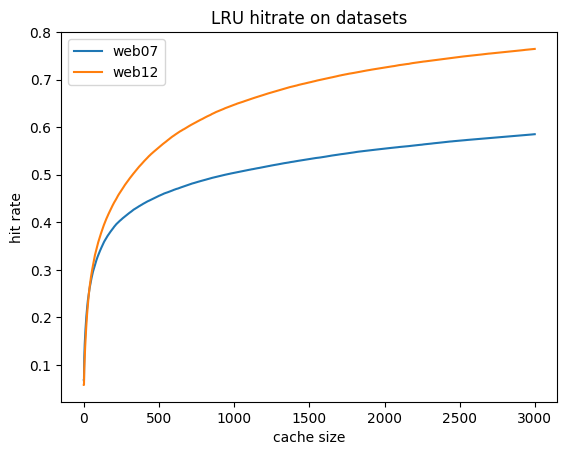

In [18]:
import matplotlib.pyplot as plt

plt.plot(x_07, web07_hit, label='web07')
plt.plot(x_12, web12_hit, label='web12')
plt.legend()
plt.xlabel('cache size')
plt.ylabel('hit rate')
plt.title('LRU hitrate on datasets')

Text(0.5, 1.0, 'LRU miss rate on datasets')

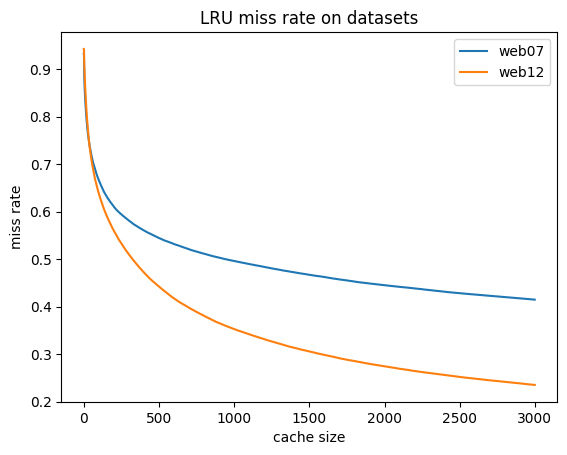

In [19]:
plt.plot(x_07, web07_miss, label='web07')
plt.plot(x_12, web12_miss, label='web12')
plt.legend()
plt.xlabel('cache size')
plt.ylabel('miss rate')
plt.title('LRU miss rate on datasets')